# Ejercicio_9

Este ejercicio se trata de intentar ajustar unos datos de una base de datos de años vividos con cierta discapacidad vs el presupuesto del pais en salud por año, acá se analiza particularmente el año 2011 para ver si podemos encontrar algún modelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def model(x_obs, param):
    y_model = param[0]*x_obs + param[1]
    return y_model

In [3]:
def loglikelihood(x_obs, y_obs, param):
    y_model = model(x_obs, param)
    p = y_model * np.exp(-(y_model/y_obs))# gamma con k=2 https://en.wikipedia.org/wiki/Gamma_distribution
    p = p/(y_obs**2)
    p = np.log(p)
    return np.sum(p)

In [4]:
def logprior(param):
    if np.abs(param[0] < 1E-2) and param[1] < 20 and param[1]>0:
        area = 2.0 * 1E-2 * 20.0
        p = np.log(1.0/area)
    else:
        p = -np.inf
    return p

In [5]:
def metropolis(x_obs, y_obs, N = 50000):
    l_param = [np.array([1/8000.0, 10.0])]
    sigma_param = np.array([1E-4, 0.5])
    n_param = len(sigma_param)
    logposterior = [0]
    for i in range(1,N):
        propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
        #print(propuesta)
        logposterior_viejo = loglikelihood(x_obs, y_obs, l_param[i-1]) + logprior(l_param[i-1])
        logposterior_nuevo = loglikelihood(x_obs, y_obs, propuesta) + logprior(propuesta)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            l_param.append(propuesta)
            logposterior.append(logposterior_nuevo)
        else:
            l_param.append(l_param[i-1])
            logposterior.append(logposterior_viejo)
    
    l_param = np.array(l_param)
    l_param = l_param[N//10:,:] # descartamos el primer 10% de la cadena
    logposterior = np.array(logposterior)
    logposterior = logposterior[N//10:]
    return l_param, logposterior

In [6]:
data = pd.read_csv("years-lived-with-disability-vs-health-expenditure-per-capita.csv")
data = data[(data['Year']==2011)]
data = data.dropna() # quita las entradas que tengan algun NaN
spending = np.array(data['Health_expenditure_per_capita_PPP'])
time = np.array(data['Years_Lived_With_Disability'])

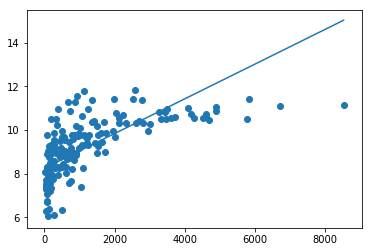

In [7]:
param, posterior = metropolis(spending, time)
model_spending = np.linspace(spending.min(), spending.max(), 100)
model_time = model(model_spending, [param[:,0].mean(), param[:,1].mean()])
plt.plot(model_spending, model_time)
plt.scatter(spending, time)

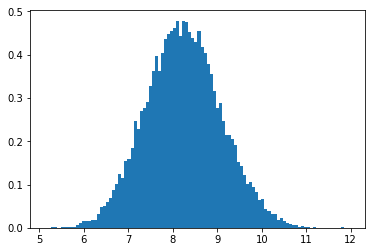

In [8]:
_ =  plt.hist(param[:,1], density=True, bins=100)

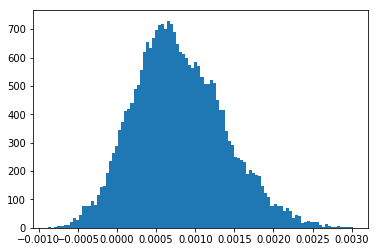

In [9]:
_ =  plt.hist(param[:,0], density=True, bins=100)

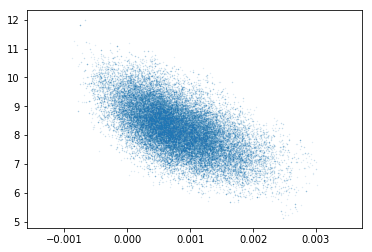

In [10]:
plt.scatter(param[:,0], param[:,1], s=0.1, alpha=0.2)

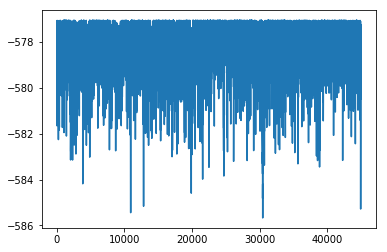

In [12]:
plt.plot(posterior)

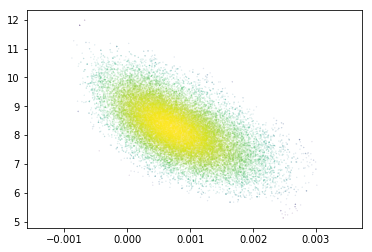

In [13]:
plt.scatter(param[:,0], param[:,1], s=0.1, alpha=0.2, c=posterior)

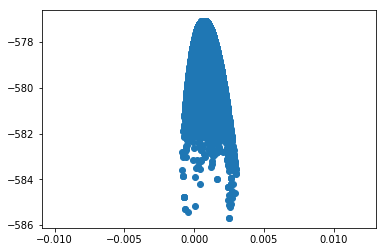

In [14]:
plt.scatter(param[:,0], posterior)

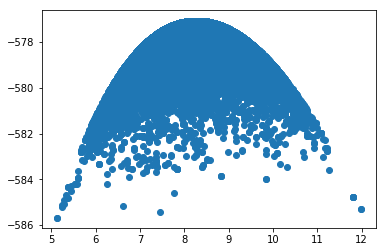

In [15]:
plt.scatter(param[:,1], posterior)


# Intento efectuado en clase


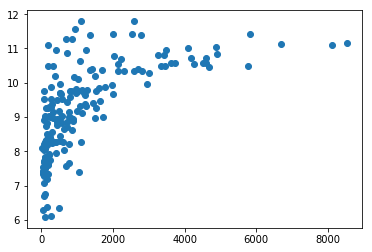

In [22]:
data = pd.read_csv("years-lived-with-disability-vs-health-expenditure-per-capita.csv")
data=data[data["Year"]==2011]
Pais=np.array(data["Code"])
vida=np.array(data["Years_Lived_With_Disability"])
PIB=np.array(data["Health_expenditure_per_capita_PPP"])
Population=np.array(data["Total_population_Gapminder)"])
plt.scatter(PIB,vida)
plt.show()

In [26]:
def model(x,a,b):
    y = a*np.tanh(x)+b
    return y
def loglikelihood(x_obs, y_obs, sigma_y_obs, a,b):
    d = y_obs -  model(x_obs, a,b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d
def logprior(a,b):
    # return -a*b*np.log(a)*
    p=0.0
    if a < 2 and a > 1 and b > 5 and b < 10 :
        p += 0.0
    else:
        p += np.inf
    return p

In [57]:
N = 50000
lista_a = [3]
lista_b= [8.0]
sigma_a=0.5
sigma_b=1.0
x_obs = PIB
y_obs = vida
# sigma_y_obs = np.ones(len(vida))
sigma_y_obs = 1/np.sqrt(Population)
for i in range(1,N):
    propuesta_a  = lista_a[i-1] + np.random.normal(0,sigma_a)
    propuesta_b  = lista_b[i-1] + np.random.normal(0,sigma_b)
    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_a[i-1],lista_b[i-1]) + logprior(lista_a[i-1],lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_a,propuesta_b) + logprior(propuesta_a,propuesta_b)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_a.append(propuesta_a)
        lista_b.append(propuesta_b)
    else:
        lista_a.append(lista_a[i-1])
        lista_b.append(lista_b[i-1])

lista_a=np.array(lista_a)
lista_b=np.array(lista_b)

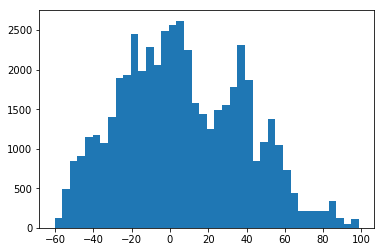

In [58]:
_=plt.hist(lista_a, bins=40)
plt.show()

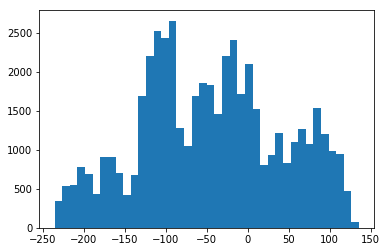

In [59]:
_=plt.hist(lista_b, bins=40)
plt.show()

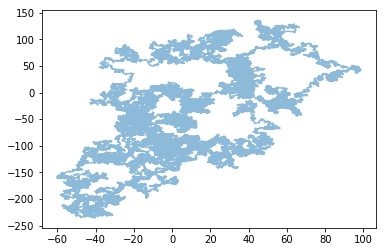

In [60]:
plt.plot(lista_a, lista_b, alpha=0.5)
plt.show()

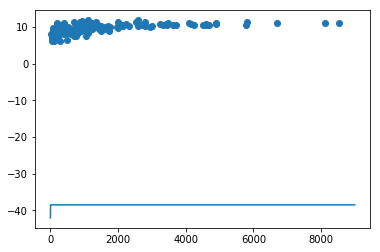

In [61]:
P_A=lista_a/(sum(lista_a))*len(lista_a)
E_a=sum(P_A*lista_a/len(lista_a))
x=np.linspace(0.5,9000,9000)
y_model = model(x,np.mean(lista_a),np.mean(lista_b))
plt.scatter(PIB,vida)
plt.plot(x,y_model)
plt.show()